# Name: E-Commerce Customer Analytics & Recommendation System

# project summary:
This project focused on leveraging a real-world E-commerce transaction dataset (online_retail.csv) to develop a comprehensive analytics and recommendation system. The primary goal was to provide a business with a data-driven tool to understand its customer base and enhance the shopping experience.

The project was executed in several key phases:

Data Preparation and Exploration:

I started by loading and cleaning the raw transactional data. 
Then performed an Exploratory Data Analysis (EDA) to gain initial insights. 

Customer Segmentation (RFM Analysis):

I engineered three critical features—Recency, Frequency, and Monetary value—to quantify customer behavior.

Using K-Means clustering, we segmented the customers into distinct groups. These segments were then analyzed to identify and name different customer types, such as "High-Value Customers," "Loyal Customers," and "At-Risk Customers."

Product Recommendation System:

I developed an item-based Collaborative Filtering model. This model analyzed co-purchase patterns from the user-item matrix to calculate the similarity between products.

The result was a robust system capable of recommending products that are most similar to an item a user has purchased, thereby providing personalized suggestions.

Interactive Dashboard (Streamlit):

Finally, all the analytical and recommendation components were integrated into a user-friendly and interactive web application using Streamlit.

The final dashboard allows users to explore the customer segment summaries and get real-time product recommendations by simply selecting a product name from a dropdown menu.

This project successfully demonstrates the entire data science lifecycle, from data cleaning and analysis to model building and deployment, resulting in a powerful and practical business intelligence tool.

# Github link:


# Importing necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


In [9]:
# Step 1: Load the dataset
df = pd.read_csv('online_retail.csv', encoding='latin1')

# Display the first 5 rows to see what the data looks like
print("First 5 rows of the data:")
print(df.head())

# Get information about the DataFrame, including data types and non-null values
print("\nDataFrame information:")
df.info()


First 5 rows of the data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-N

In [10]:
# Step 2: Data Cleaning and Feature Engineering

# Drop rows with any missing values
df.dropna(inplace=True)

# Converting the 'InvoiceDate' column to a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Creating a new feature 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Remove rows with negative quantities (which typically indicate canceled orders)
# We can identify these by 'InvoiceNo' starting with 'C'
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

# Display the cleaned data info to confirm the changes
print("\nDataFrame information after cleaning:")
df.info()

# Let's also see the first few rows of our cleaned and engineered data
print("\nFirst 5 rows of the cleaned data:")
print(df.head())


DataFrame information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB

First 5 rows of the cleaned data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE 

In [11]:
# Starting with EDA

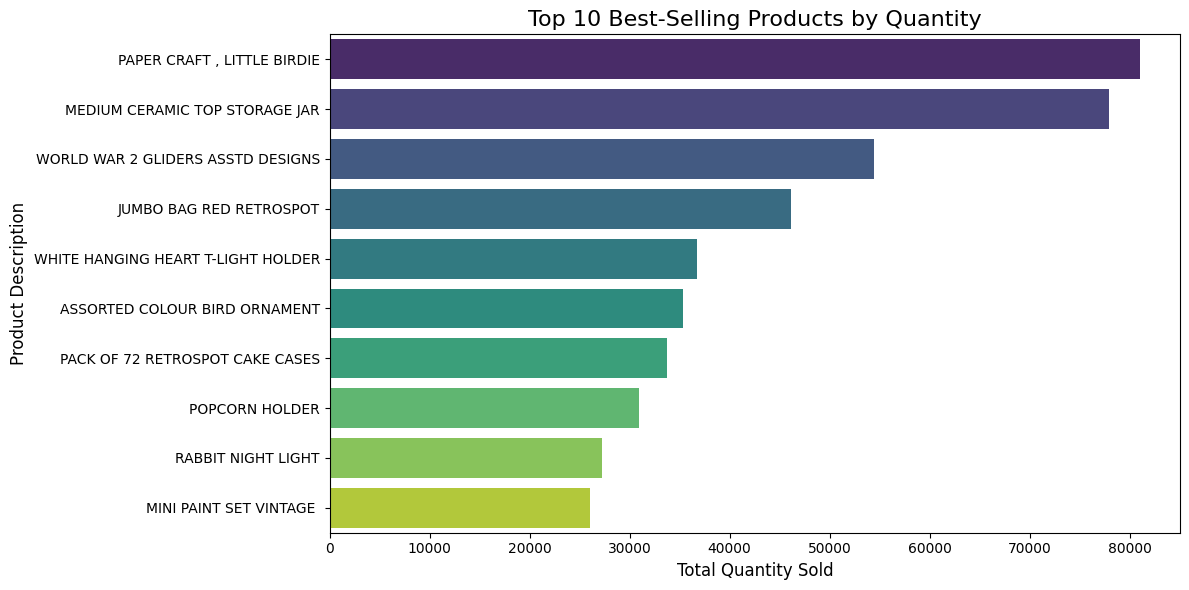

In [12]:
# --- Visualization 1: Top 10 best-selling products ---
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, hue=top_10_products.index, palette='viridis', legend=False)
plt.title('Top 10 Best-Selling Products by Quantity', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.tight_layout()
plt.show()


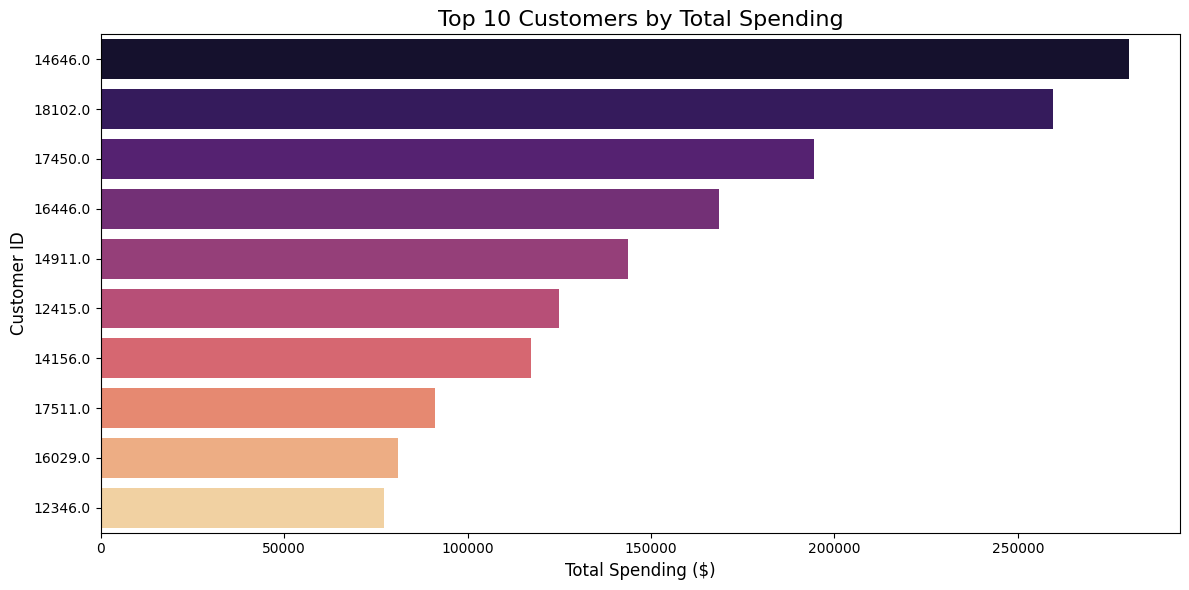

In [13]:
# --- Visualization 2: Top 10 customers by total spending ---
top_10_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_customers.values, y=top_10_customers.index.astype(str), hue=top_10_customers.index.astype(str), palette='magma', legend=False)
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.tight_layout()
plt.show()



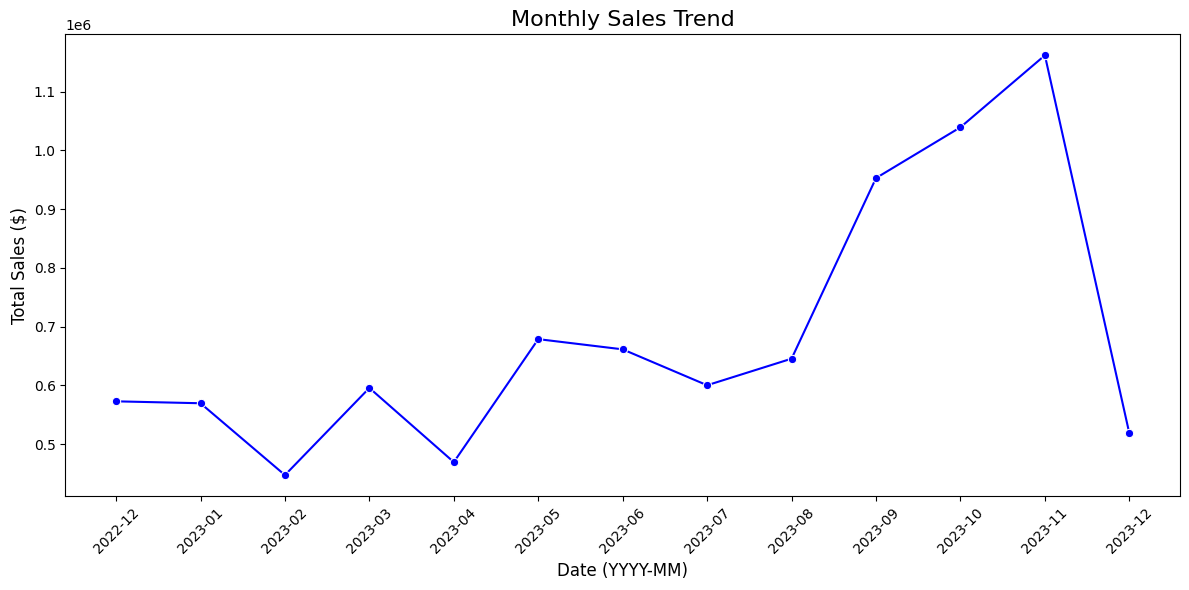

In [14]:
# --- Visualization 3: Monthly Sales Trend ---
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date (YYYY-MM)', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



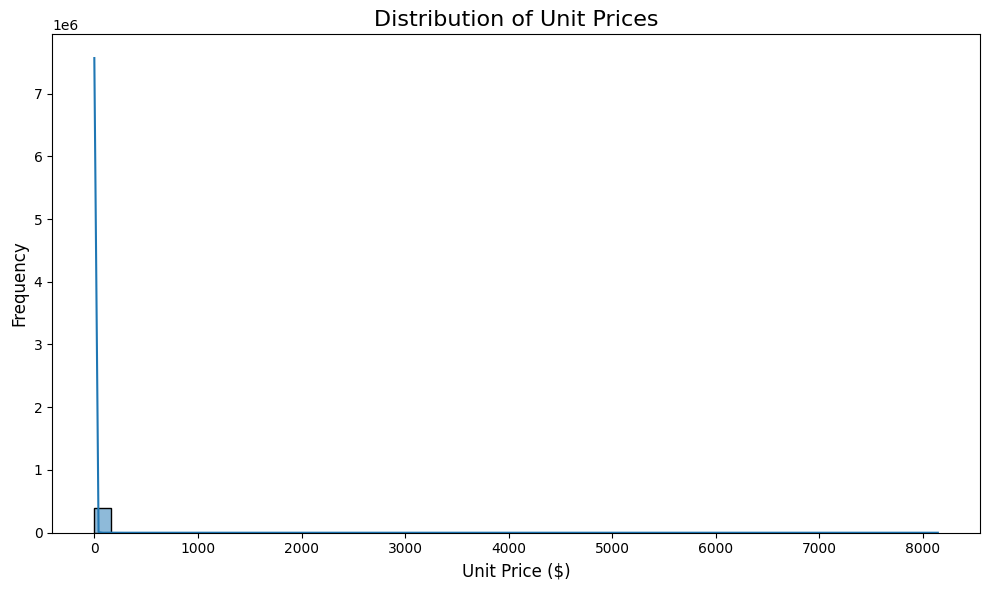

In [15]:
# --- Visualization 4: Distribution of Unit Prices ---
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices', fontsize=16)
plt.xlabel('Unit Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
# Step 4: RFM Feature Engineering

# Create a reference date for calculating Recency. Let's use the last invoice date + one day.
latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (latest_date - date.max()).days,
    'InvoiceNo': lambda num: num.nunique(),
    'TotalPrice': lambda price: price.sum()
})

# Rename the columns for clarity
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

# Reset the index so 'CustomerID' is a column
rfm_df = rfm_df.reset_index()

# Display the first 5 rows of the new RFM DataFrame
print("First 5 rows of the RFM DataFrame:")
print(rfm_df.head())

# Get information about the RFM DataFrame
print("\nRFM DataFrame information:")
rfm_df.info()

First 5 rows of the RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

RFM DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


# Starting with Clustering 

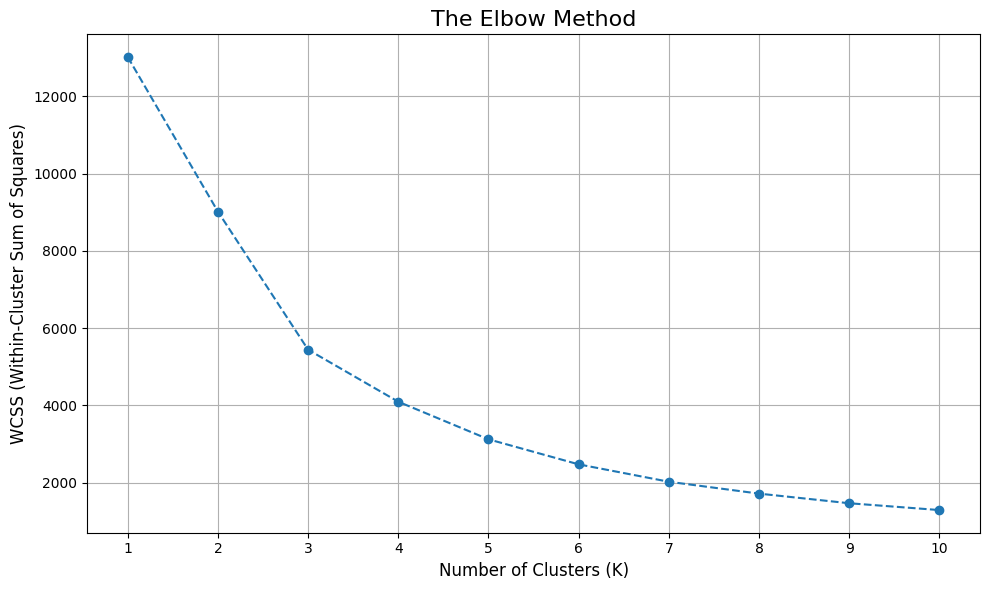

In [18]:
# Step 5: Clustering Techniques (K-Means)

# 1. Preprocessing the RFM data: Scaling the features
rfm_data = rfm_df[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# 2. Determine the optimal number of clusters (K) using the Elbow Method
# We'll calculate the Within-Cluster Sum of Squares (WCSS) for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Step 6: Apply K-Means Clustering and Add Cluster Labels

# Based on your visual inspection of the elbow plot, choosing the optimal number of clusters (K)
# For example, if I chose 10 as the optimal number, you would use n_clusters=10
k = 4 # This is an example, replace with your chosen value

# Train the K-Means model with the chosen K
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)

# Add the cluster labels to our original RFM DataFrame
rfm_df['Cluster'] = kmeans.labels_

# Display the first 5 rows to see the new 'Cluster' column
print("RFM DataFrame with cluster labels:")
print(rfm_df.head())

# The next step will be to analyze the characteristics of each cluster.

RFM DataFrame with cluster labels:
   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        0
1     12347.0        2          7   4310.00        3
2     12348.0       75          4   1797.24        3
3     12349.0       19          1   1757.55        3
4     12350.0      310          1    334.40        1


Summary of each customer cluster:
   Cluster  Recency_Mean  Frequency_Mean  Monetary_Mean  Customer_Count
0        0         15.67           22.05       12453.23             211
1        1        248.56            1.55         478.11            1062
2        2          7.38           82.69      127338.31              13
3        3         43.91            3.66        1349.70            3053


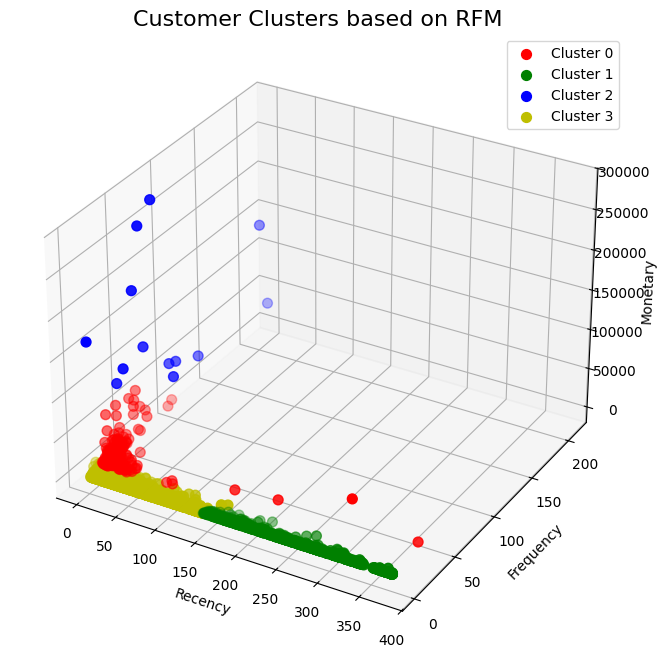

In [23]:
# Step 7: Analyze and Interpret Customer Segments

# Group the RFM data by 'Cluster' and calculate the mean for each feature
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

# Rename columns for clarity
cluster_summary.columns = ['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Customer_Count']
cluster_summary = cluster_summary.reset_index()

# Display the summary of each cluster
print("Summary of each customer cluster:")
print(cluster_summary)

# You can now analyze this table to give meaningful names to your clusters,
# such as 'High-Value Customers', 'At-Risk Customers', etc.
# For example, a cluster with low Recency, high Frequency, and high Monetary value would be a 'High-Value' segment.

# Additionally, let's visualize the clusters in a 3D scatter plot to see how they are separated
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i in range(k):
    cluster_data = rfm_df[rfm_df['Cluster'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               color=colors[i], label=f'Cluster {i}', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Clusters based on RFM', fontsize=16)
ax.legend()
plt.show()

# After this, we can move on to Collaborative Filtering-based Product Recommendation.

In [24]:
# Step 8: Collaborative Filtering-based Product Recommendation 

# 1. Create a user-item matrix
user_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# 2. Calculate the cosine similarity between products
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.T.index, columns=user_item_matrix.T.index)

# 3. Build a recommendation function
def get_recommendations(product_name, num_recommendations=5):
    if product_name not in item_similarity_df.index:
        print("Product not found. Please try one of the product names from the list below.")
        return []
    
    similarity_scores = item_similarity_df[product_name]
    similar_products = similarity_scores.sort_values(ascending=False).head(num_recommendations + 1)
    similar_products = similar_products[similar_products.index != product_name]
    
    print(f"Products similar to '{product_name}':")
    for product in similar_products.index:
        print(f"- {product}")
        
    return similar_products.index.tolist()

# --- New code to find and display valid product names ---
# Display a few random product names to help the user choose one
sample_products = user_item_matrix.columns.to_list()
print("Here are a few sample product names from the dataset:")
print(np.random.choice(sample_products, 5, replace=False))
print("-" * 50)

# --- Example usage with a valid product name ---
# Now, you can replace the product name below with one you found in the sample list
get_recommendations('WHITE HANGING HEART T-LIGHT HOLDER')

Here are a few sample product names from the dataset:
['4 LAVENDER BOTANICAL DINNER CANDLES' 'RED VINTAGE SPOT BEAKER'
 'SET OF 4 KNICK KNACK TINS POPPIES' 'SPACE CADET RED' 'RAIN PONCHO ']
--------------------------------------------------
Products similar to 'WHITE HANGING HEART T-LIGHT HOLDER':
- GIN + TONIC DIET METAL SIGN
- RED HANGING HEART T-LIGHT HOLDER
- WASHROOM METAL SIGN
- LAUNDRY 15C METAL SIGN
- GREEN VINTAGE SPOT BEAKER


['GIN + TONIC DIET METAL SIGN',
 'RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER']